In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\mousami Datascience class\Regression Analysis\Multi Linear Regression\MLR Excel\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

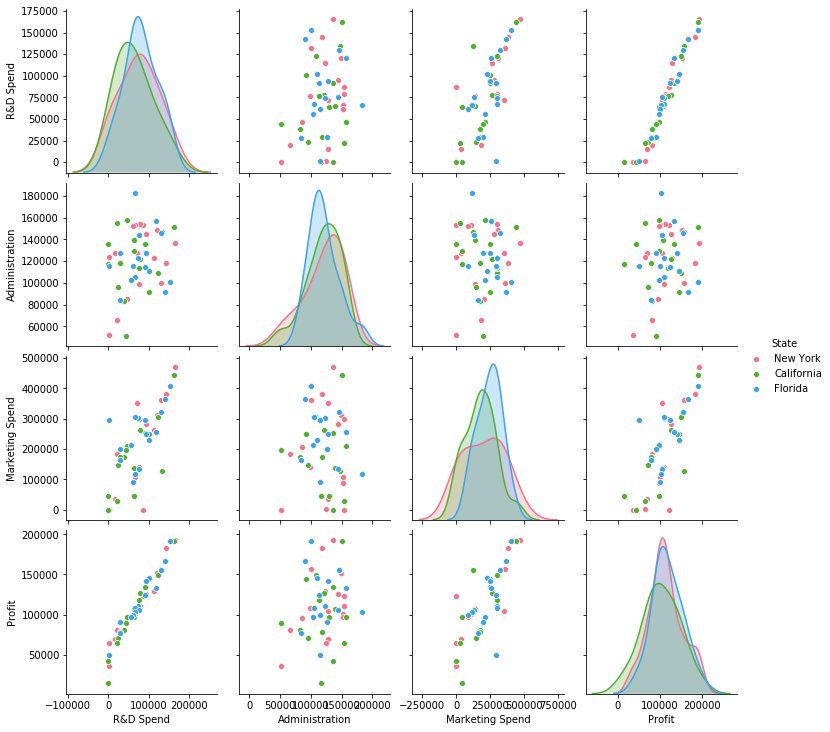

In [7]:
sns.pairplot(data=df,hue='State',palette="husl")

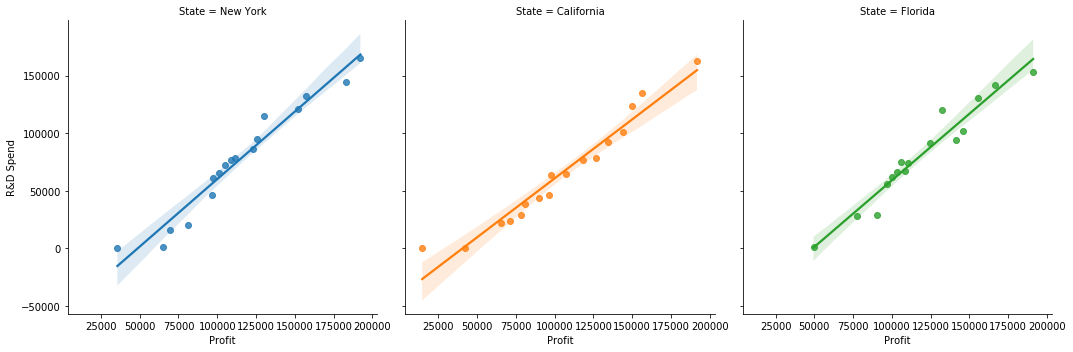

In [8]:
sns.lmplot(x="Profit", y="R&D Spend",hue='State' ,col="State", data=df)

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


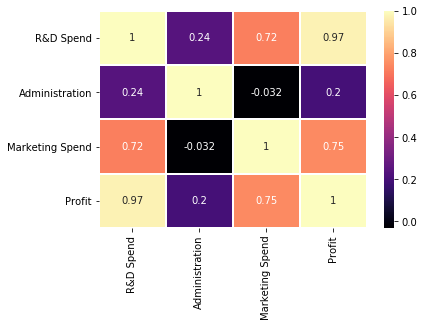

In [10]:
sns.heatmap(df.corr(),cmap='magma',annot=True,linewidths=1)

In [11]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [12]:
Y = df['Profit']
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [13]:
# Train and Test Split.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size =1/3,random_state=0)

In [16]:
# Train data

X_train = X[0:40]
X_train.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [17]:
Y_train = Y[0:40]
Y_train.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [18]:
# Test data

X_test = X[40:]
X_test.head()


,R&D Spend,Administration,Marketing Spend
40,28754.33,118546.05,172795.67
41,27892.92,84710.77,164470.71
42,23640.93,96189.63,148001.11
43,15505.73,127382.30,35534.17
44,22177.74,154806.14,28334.72


In [19]:
Y_test = Y[40:]
Y_test.head()

40    78239.91
41    77798.83
42    71498.49
43    69758.98
44    65200.33
Name: Profit, dtype: float64

In [20]:
# Model fitting and training.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm.intercept_

57382.25431762841

In [25]:
lm.coef_

array([ 0.76471181, -0.05197212,  0.02753623])

In [26]:
cdf = pd.DataFrame(data= lm.coef_ , index = X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
R&D Spend,0.764712
Administration,-0.051972
Marketing Spend,0.027536


In [27]:
# Calculation of the standard errors.

n = X_train.shape[0]
n
print('Number of rows: ',n)
k = X_train.shape[1]
k
print('Number of Column: ',k)
dfn = n-k
dfn
print('Degree of freedom: ', dfn)


Number of rows:  40
Number of Column:  3
Degree of freedom:  37


In [28]:
# Prediction
X_train_pred = lm.predict(X_train)
X_train_pred

array([189703.02704912, 186078.51371919, 180697.01981163, 172169.78662354,
       171386.48928353, 163034.32904834, 156190.88900859, 158377.61041019,
       150413.95937083, 154447.65092022, 135878.80863684, 136473.76194268,
       129423.49896699, 127645.3952882 , 148031.56426383, 145795.48495903,
       117999.2126213 , 130008.74462101, 129730.93601215, 115489.96616756,
       118000.65045678, 117589.31205103, 115937.7576409 , 111921.25446546,
       115009.75743845, 103378.21901338, 111187.31234763, 115603.74687453,
       101653.51136679, 102548.3266243 , 101289.45394418,  98626.92155854,
       100424.95574614, 100373.25081321,  90493.70468158,  93808.80432532,
        78236.66436531,  93843.21957046,  74526.10961253,  87374.46837869])

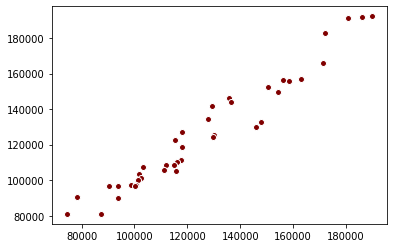

In [29]:
#X_train_new = X_train_pred.reshape(-1,1)
#X_train_new.info
plt.scatter(X_train_pred,Y_train,color='maroon',edgecolors='white')



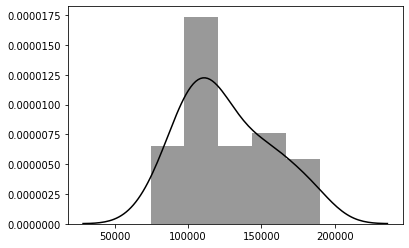

In [30]:
sns.distplot(X_train_pred,color='black')

In [31]:
# Train error

Train_error = np.square(X_train_pred - Y_train)
Train_error

0     6.547473e+06
1     3.264461e+07
2     1.071923e+08
3     1.151802e+08
4     2.702491e+07
5     3.652038e+07
6     4.675689e+03
7     6.890680e+06
8     3.232123e+06
9     2.197445e+07
10    1.049219e+08
11    6.061616e+07
12    1.479148e+08
13    4.438164e+07
14    2.380514e+08
15    2.521250e+08
16    8.088695e+07
17    2.151452e+07
18    2.985569e+07
19    5.309882e+07
20    2.240882e+05
21    3.939184e+07
22    3.119790e+07
23    1.015865e+07
24    4.170211e+07
25    1.620965e+07
26    2.974363e+07
27    1.122633e+08
28    2.653213e+06
29    2.382968e+06
30    1.827536e+06
31    1.307276e+06
32    8.982703e+06
33    1.291921e+07
34    3.867715e+07
35    7.132669e+06
36    1.555390e+08
37    1.516386e+07
38    4.492954e+07
39    4.056045e+07
Name: Profit, dtype: float64

In [32]:
sum_error = np.sum(X_train_pred)
sum_error

5030804.049999999

In [50]:
# R-squared for the model fit [TRAIN]

print('R-Squared :', round(metrics.r2_score(Y_train,X_train_pred),2))

R-Squared : 0.95


In [49]:
print('MSE :', Train_error.mean())

print('RMSE :', np.sqrt( Train_error.mean()))

MSE : 50088633.47845248
RMSE : 7077.332370212132
